# Lecture01 - Introduction and Overview of Coastal Systems
<div class="alert alert-block alert-success">
<b>Learning Objectives:</b> continental shelf and shelf break, coastal zone definition, common coastal morphology, common coastal processes, common land and sea factors, sediment classification
    <!-- continental slope, shelf, inner shelf, beach,  -->
</div>

Before class:
- Tue, Thur: Review syllabus, HuskyCT
- Thur: [Explore 100 years change in Connecticut's Coast: browse website, connect to your personal experience with Connecticut's Coast, and bring questions to the class](https://clear3.uconn.edu/viewers/Coast1934/)

After class:
<!-- - [Explore (browse website with questions) 100 years change in Connecticut's Coast](https://clear3.uconn.edu/viewers/Coast1934/) -->
- Set up JupyterNotebook following JupyterTutorial.ipynb *it's recommended to work on it during the office hour
- optional: if you are interested in coastal landforms, feel free to watch [this 15 mins video: "Coastal Landforms for Fancy Mapping"](https://www.youtube.com/watch?v=ztemzsxso0U&t=269s)

Reference:

- Textbook chapters 1, 2
- BS 2.6 (optional BS chapter 1, 2)
<!-- BS chapter 1, 2; Brink chapter 1  -->

## Class Discussion 1: The sea around us

Let's watch a short video together to begin the class: 
[![](../figures/lecture01/video1.png)](https://www.youtube.com/watch?v=3RauOeHkQk4)

### Continental Shelves vs slopes

The continental margins occur around all major landmasses, and their broad features are often determined by plate tectonics. **Tectonically active margins**, such as off Peru or Japan, are characterized by oceanic plates sinking below continental crust. In these regions, there is often a terrestrial coastal mountain range, the overall continental margin is relatively narrow, and there is frequently an adjoining oceanic trench in deep water (e.g., Mariana trench). Active margins tend to have a good deal of seismic activity as well. **Inactive/passive margins** occur far from spreading centers or subduction zones. These are often comparatively wide regions and often adjoin land with relatively gentle terrain. The continental margins of Argentina or the eastern United States are good examples.

**The continental shelf** is a relatively gently sloping area adjoining the shoreline and extending offshore to meet the much more steeply sloping **continental slope**. The boundary between these regions is often a well-defined **shelf break** where the bottom slope abruptly increases.

<img src="../figures/lecture01/shelf_slope.jpg" width="600"><!-- source: Brink book -->

In [1]:
# %%capture

# # Install necessary packages and restart the kernel.
# !pip install netcdf4
# !pip install xarray
# !pip install ipympl
# # resetart kernel
# import IPython
# IPython.Application.instance().kernel.do_shutdown(True) #automatically restarts kernel

In [2]:
# # to enable the jupyter widgets so that you can plot interactive figures
# from google.colab import output
# output.enable_custom_widget_manager()

In [3]:
# import python libraries
import xarray as xr
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

In [4]:
# load ocean topography data (ETOPO2022 - bedrock - 60 arc second: https://www.ncei.noaa.gov/products/etopo-global-relief-model) 
# opendap_url = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/60s/60s_bed_elev_netcdf/ETOPO_2022_v1_60s_N90W180_bed.nc'  
opendap_url = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/60s/60s_bed_elev_netcdf/ETOPO_2022_v1_60s_N90W180_bed.nc?lat[0:10:10799],lon[0:10:21599],z[0:10:10799][0:10:21599]'
ds = xr.open_dataset(opendap_url, engine='netcdf4')
ds

<xarray.Dataset> Size: 9MB
Dimensions:  (lat: 1080, lon: 2160)
Coordinates:
  * lat      (lat) float64 9kB -89.99 -89.83 -89.66 -89.49 ... 89.51 89.68 89.84
  * lon      (lon) float64 17kB -180.0 -179.8 -179.7 ... 179.5 179.7 179.8
Data variables:
    z        (lat, lon) float32 9MB ...
Attributes:
    GDAL_AREA_OR_POINT:             Area
    node_offset:                    1
    GDAL_TIFFTAG_COPYRIGHT:         DOC/NOAA/NESDIS/NCEI > National Centers f...
    GDAL_TIFFTAG_DATETIME:          20220929123913.0
    GDAL_TIFFTAG_IMAGEDESCRIPTION:  Topography-Bathymetry; EGM2008 height
    Conventions:                    CF-1.5
    GDAL:                           GDAL 3.3.2, released 2021/09/01
    NCO:                            netCDF Operators version 4.9.1 (Homepage ...
    DODS.strlen:                    0
    crs.DODS.strlen:                0

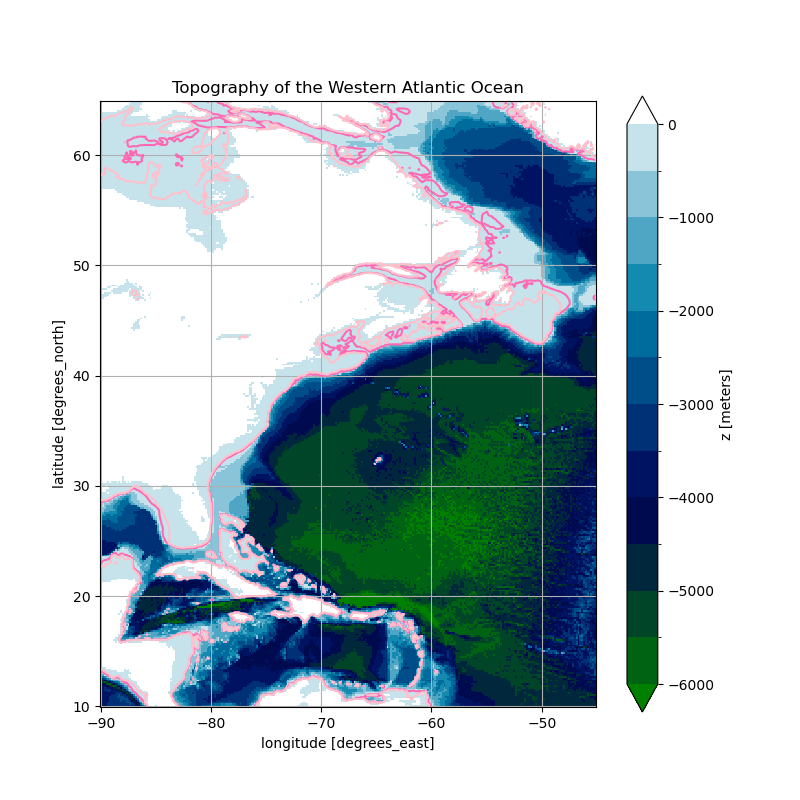

In [5]:
# define lat and lon boundaries of region of interest - Western Atlantic
lat = [10, 65]
lon = [-90, -45]
mask_lat = np.where((ds.lat > lat[0]) & (ds.lat <= lat[1]))[0]
mask_lon = np.where((ds.lon > lon[0]) & (ds.lon <= lon[1]))[0]

# map the topography
# ("plotting", see more: https://xarray.pydata.org/en/stable/user-guide/plotting.html)
# this is to make the plot interactive: https://matplotlib.org/ipympl/examples/full-example.html
%matplotlib widget 
# if you dont wish the plot to be interactive you may comment the line above and uncomment the line below
# %matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
ds.z[mask_lat, mask_lon].plot.pcolormesh(ax=ax, vmax=0, vmin=-6000, levels=13, 
                                        cmap=cm.ocean, x='lon', y='lat', add_colorbar=True)
ds.z[mask_lat, mask_lon].plot.contour(ax=ax, levels=[-200], colors = 'hotpink', linestyles = '-')
ds.z[mask_lat, mask_lon].plot.contour(ax=ax, levels=[-100], colors = 'pink', linestyles = '-')
ax.set_title('Topography of the Western Atlantic Ocean')
ax.grid(True)
ax.set_aspect('equal', adjustable='box')


<div class="alert alert-block alert-warning">
<b>Discussion:</b> The light and dark pink contours show the 100 and 200 m isobath, respectively, which represent the continental shelf break. Can you estimate the width of the continental shelf along the east coast of the United States? Hint: one degree of lat/lon is about 110 km.
</div>

### East vs west coast
As can be seen from the below figure, there is a direct correlation between the **tectonic plate setting** and the **continental shelf width**. For instance, some of the **narrowest** shelves are found off the **tectonically active west coasts of North and South America**. Broad shelves on
the other hand are common to trailing margins (i.e. east coasts of North America). Since the **shelf break** is located at relatively constant water depths of 100 m to 200 m, narrow shelves imply **steep** slopes, whereas wide shelves have low gradients.

<img src="../figures/lecture01/continental_shelf.png" width="1000"><!-- source: B.S. book -->

## 1. Coasts and Coastal Oceans
> - A [<font size="3">**coast**</font>](https://en.wikipedia.org/wiki/Coast) (coastline, shoreline, seashore) is the land next to the sea or the line that forms the boundary between the land and the ocean or a lake<sup>[1]</sup>.
> - "<font size="3">**Coastal waters**</font>" (or "coastal seas/oceans") is a term that carries different meanings depending upon the context, ranging from a geographic reference to the waters within a few kilometers of the coast, to describing the entire continental shelf that may stretch for more than a hundred kilometers from land<sup>[2]</sup>.

### 1) The Coastal Zone: defination and nomenclature

<font size="3">**Coastal zone**</font> (coast + coastal oceans) is particularly
important from a human perspective. A large
proportion of the world **population** is concentrated
in the coastal zone, including almost all
of the major cities (as of 2018, [38.1% of global population lives within 100 km of a coast, and 15% of global population lives within a few miles of a coast − and the number is growing rapidly](https://www.preventionweb.net/news/15-global-population-lives-within-few-miles-coast-and-number-growing-rapidly))<sup>[3]</sup>. The coastal zone is used for
**fishing, transportation, recreation, waste disposal,
cooling and drinking water** and is potentially
a **source of energy** from tidal and wave
power. Many of these activities pose an **environmental
threat to coastal systems**, both physical
and biological, through pollution, siltation,
dredging, infilling and a host of other activities
that alter the way natural systems operate. In
recent years there has been increasing pressure
from leisure activities focused on water sports,
and recreation at the seashore (Textbook Figure 1.1). In
addition, natural processes often pose a **hazard
to human occupation and utilisation** of the
coastal zone through wave action, flooding,
storm surge, and through coastal erosion and
sedimentation. Because of the threats to human
life and activities posed by both environmental
impact and natural hazards, there is a strong
economic incentive to improve our understanding
of processes operating in the coastal zone so
that we can minimise their effects, and use this
knowledge in the development of comprehensive
coastal zone management planning.

<!-- <div class="alert alert-block alert-warning">
<b>Discussion:</b> Can you list some other coastal hazards and human impacts on the coastal zone?
</div> -->

<!-- ![alt text](../figures/lecture01/coastal_features.png) -->
<img src="../figures/lecture01/coastal_features.png" width="1000"><!-- source: text book -->

*HHW: Higher High Water (indicating high tide, sometimes storm), LLW: Lower Low Water (indicating low tide)

**Coastal zone** broad term for the area influenced by proximity to the coast; both the onshore and offshore limits are (deliberately)imprecisely defined. The limit on land may be a few hundred metres inland from a cliff top or several kilometres where there are
extensive sand dunes, or along tidal estuaries. The seaward limit may be the edge of the continental shelf (**shelfbreak**) and is usually at least several kilometres. 

**Littoral zone** portion of the coastal profile where sediment can be transported by wave action. **Offshore zone** portion of the profile where there is no significant transport of sediment by wave action.

**Nearshore zone** portion of the profile extending from the limit of significant sediment transport by waves to the low tide line. **Shore or beach** portion of the profile subject
to wave action and which is exposed subaerially at least some of the time. The seaward limit is defined by the spring low tide line and the landward limit by the limit of swash uprush during  normal  storms. The landward limit is often taken as the vegetation line.

**Foreshore** portion of the beach subject to wave action during non-storm conditions.
**Backshore** portion of the beach subject to wave action only during storms. 

**Surf zone** zone of broken waves (surf bores) extending from the breaker zone to the foreshore. Varies with beach slope and wave conditions and will only be present when waves break some distance offshore. **Swash zone** zone of wave run-up on the beach and return of water in the form of backwash. It varies with wave and slope conditions.

**Intertidal zone** zone between high and low water (tide).

**Shoreline** can be defined instantaneously as the intercept of the mean water level along the beach, but it is often used loosely as the swash limit or the landward edge of the backshore.

#### Connecting the coast wthe ith continental margin

<img src="../figures/lecture01/Moulton2023.png" width="1000"><!-- source: Moulton, M., Suanda, S. H., Garwood, J. C., Kumar, N., Fewings, M. R., & Pringle, J. M. (2023). Exchange of plankton, pollutants, and particles across the nearshore region. Annual Review of Marine Science, 15(1), 167-202. -->

### 2) Coastal Morphology and Examples of Coastal Systems

The physical shape and structure of the coast is called **morphology**. Coastal morphology for a sandy stretch of coast thus is the topography of the sandy dunes and beach and the underwater topography of the seabed. Some examples of **coastal systems** including beaches (sandy or cobbled) and dunes, barrier beaches (e.g., Bluff Point), salt marshes/ tidal wetlands (e.g., Connecticut's coastal marshes), estuaries (e.g., Connecticut River estuary), and deltas (e.g., Mississippi River Delta). 

One approach to coastal classification is to consider whether coastal processes in the coastal zone are primarily contributing sediment to the coastline or whether they are removing sediment from the coastline. The former of these is recognized as **deposition**, whereas the latter is known as **erosion**. Where erosion is the dominant process, the coastline is retreating landward, and where deposition is dominant, the coastline is advancing seaward.

- Erosional Coasts:
> In places where there is an **abundance of wave energy or ocean currents** and/or a **lack of sediment** available for deposition, erosion of the coast will be the dominant mechanism of change. Quite often, erosional coasts are narrow and characterized by resilient rocky shorelines that are exposed to high-energy waves and supply relatively little sediment to the adjacent shore. This is the case for much of the western U.S., where there are numerous rocky exposures and vertical sea cliffs (sidenote: bluffs are a specific type of cliff, often characterized by their broader, rounded shape and formation from softer materials like sediment). Often, but not necessarily always, erosional coasts are associated with coastal zones along **active plate margins** where there is a steady uplift of the landform, and few well-developed drainage basins and river systems have developed to deliver large quantities of sediment to the coast.

<img src="../figures/lecture01/erosionalcoast.fw.png" width="600"><!-- source: https://geophile.net/Lessons/coasts/coasts_03.html -->

- Depositional Coastal Features: 
> Depositional coasts are characterized by **abundant sediment supply** that results in the net deposition of sediment and the creation of new coastal landforms despite the energy of the waves and ocean currents. There is a wide variety of landforms along depositional coasts, such as extensive beaches, barrier islands, and expansive coastal wetlands and mudflats. They are most common along mature, **tectonically inactive continental margins** where ample geologic time has passed for large drainage basins and rivers to develop, which can provide large quantities of sediment that can be distributed by waves and tides at the coastline.

<img src="../figures/lecture01/depositionalcoast.fw.png" width="600"><!-- source: https://geophile.net/Lessons/coasts/coasts_03.html -->

### 3) Factors influencing coastal morphology and processes

Davies (1972) provided several dynamic coastal classifications highlighting the controls on coastal development. He recognised three broad groups of factors that influence coastal development, termed (1) physical factors of the land (e.g., sediment supply); (2) physical factors of the sea (e.g., wave, tide, sea level); and (3) biological factors (see below Table). 

<img src="../figures/lecture01/coastal_development_factor.png" width="500">


## 2. Sediment

### 1) Sediment Classification
The size of the sediment grains can be used to classify the
sediment. 

It takes energy to move particles. The larger or heavier the particle, the more energy it will take to move it. Lower the energy level and the particle will be deposited instead of moved. The image below illustrates this point. Larger and heavier particles such as boulders require very high energy levels to move, and only a small drop in energy to be deposited. Conversely, very small and light particles such as silts and clays barely need any energy to move them, and need very quiet water to be deposited. 

<img src="../figures/Lecture01/size_energy.fw.png" width="600"><!-- source: https://geophile.net/Lessons/sediments/sediments_02.html -->

#### Silt and Clay
Sand-sized material
consists mostly of quartz or carbonate and is the most abundant coastal material.
Sand is a **non-cohesive** material; the individual near-spherical grains do not stick together
and are very resilient. Material with a grain size smaller than 63 μm can be
defined as either clay or silt. Silts are soils with fine, nearly spherical grains that do not include clay minerals.
Mineralogically, silt is composed of quartz and feldspar. Clay on the other hand
mainly consists of clay minerals that originate from the weathering of feldspar.
Chemically, clay minerals are layered metal silicates: thin plate-shaped particles
held together by electrostatic forces. Hence, clays have strong
**cohesive** properties.

Often both silt and clay particles are found together. A fluid-sediment mixture of (salt)
water, silt, clay and organic materials (also sometimes very fine sand) is named mud. 
Based on the size of the beach material, the world’s beaches can be classified as muddy
coasts, sandy coasts or gravel/shingle coasts.

<img src="../figures/Lecture01/silt_clay.jpg" width="600"><!-- source: https://www.turfmastersod.com/single-post/2019/04/02/what-is-soil -->

### 2) Souce of Sediment
<img src="../figures/lecture01/sediment_source.jpg" width="800"><!-- source: Komar book -->

### 3) Sediment Transport Example: Seasonal Beach Changes

Typically, beaches and dunes undergo a seasonal transformation from a “summer” beach to a "winter" beach. A summer beach has a wide, well-developed berm often with a vegetated dune where American beach grass grows seaward onto the berm. A winter beach is lower, may not have a berm, and often shows signs of loss of beach grass. These differences are caused by seasonal storms and by differences in waves formed by local winds that vary seasonally. Because the [Connecticut](https://beachduneguide.uconn.edu/seasonal-beach-changes/) shoreline is buffered by Long Island, the seasonal variation in winds is minimized relative to shorelines directly adjacent to the ocean. Winter beaches are generally steeper and narrower, while in the summer beach, smaller, calmer waves dominate, and beaches are generally wider and have a gradual slope.

<img src="../figures/lecture01/beach_seasonal_change.png" width="800"><!-- source: B.S. book -->

## Class Discussion 2: The Connecticut Coast Erosion and Deposition

Let's use [<font size="5">Google Earth</font>](https://earth.google.com/web/@41.32953548,-72.05880826,11.62790668a,12636.3277854d,35y,0h,0t,0r/data=CgRCAggBMikKJwolCiExall1RkEyek1TLUp0NG5JdE9BcDRsQ2lyLUp4UTF4ZnQgAToDCgEwQgIIAEoICJSv1vABEAE?authuser=0) to identify whether the landforms along the Connecticut coast are primarily depositional or erosional, and to

<div class="alert alert-block alert-warning">
<b>Class Discussion:</b> discuss the landform change in the past 100 years from browsing "Connecticut's Coast: Then and Now". 
</div>

[Explore 100 years change in Connecticut's Coast: browse website, connect to your personal experience with Connecticut's Coast, and bring questions to the class](https://clear3.uconn.edu/viewers/Coast1934/)

some discussion points: erosion caused by human development and storms, 

# References
<sup>[1]</sup>."coast". The American Heritage Dictionary of the English Language (5th ed.). HarperCollins. Retrieved 2024-07-19. \
<sup>[2]</sup>. Mantoura, R. F. C; Martin, Jean-Marie; Wollast, R, eds. (1991). Ocean margin processes in global change: report of the Dahlem Workshop on Ocean Margin Processes in Global Change, Berlin, 1990, March 18–23. Chichester, New York: Wiley. ISBN 978-0-471-92673-3. OCLC 22765791 \
<sup>[3]</sup>. Cosby, A.G., Lebakula, V., Smith, C.N. et al. Accelerating growth of human coastal populations at the global and continent levels: 2000–2018. Sci Rep 14, 22489 (2024). https://doi.org/10.1038/s41598-024-73287-x 